In [1]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
from shapely import wkt

In [12]:
#import the data:
shannon_df  = pd.read_csv("exploitation_zone/shannon_index/part-00000-a350adf1-ddbc-4bdd-8d07-b066a4c2de2d-c000.csv")
gini_df     = pd.read_csv("exploitation_zone/gini_coefficients/part-00000-e71b4343-a41b-4691-9b57-651770fcd191-c000.csv")
aver_resolution = pd.read_csv("exploitation_zone/avg_resolution_time/part-00000-a470b79c-2dc3-47bf-a3a4-31e4f9c71267-c000.csv")

### Visual study using geojson
we use from the landing_zone in the lookup_tables the "BarcelonaCiutat_Barris.csv" where we obtain the geographies of the neighborhoods that we can use to do a more visual analysis.

<Figure size 1200x800 with 0 Axes>

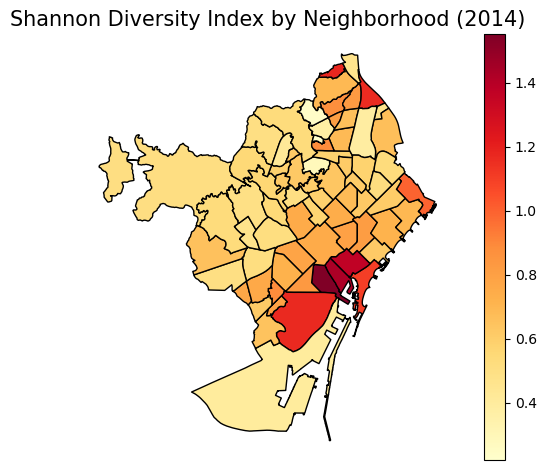

<Figure size 1200x800 with 0 Axes>

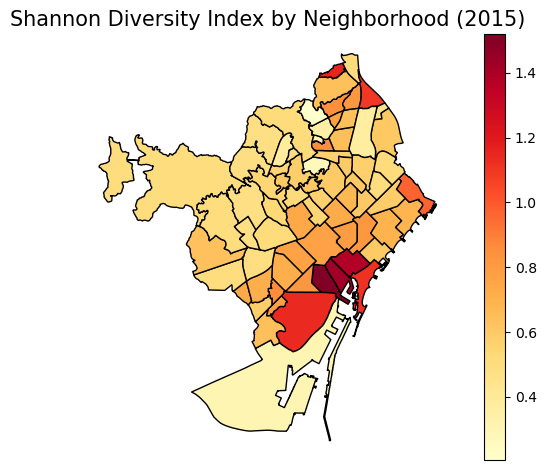

<Figure size 1200x800 with 0 Axes>

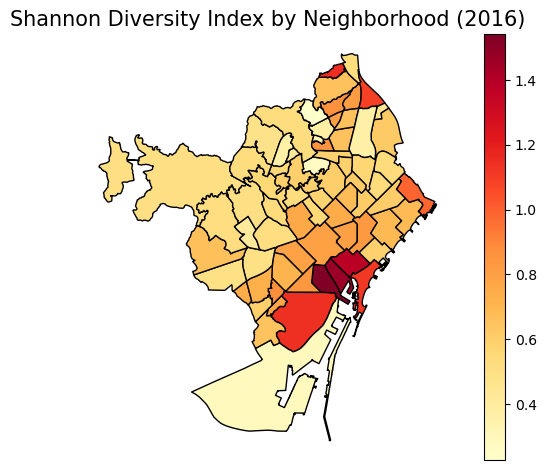

<Figure size 1200x800 with 0 Axes>

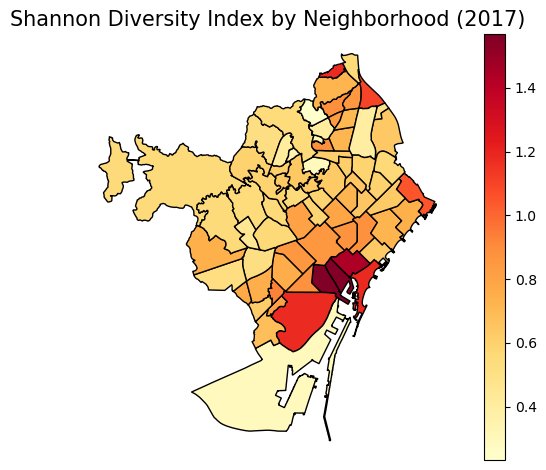

In [ ]:



barrios = pd.read_csv("landing_zone/lookup_tables/BarcelonaCiutat_Barris.csv")
barrios["geometry"] = barrios["geometria_wgs84"].apply(wkt.loads)
barrios_gdf = gpd.GeoDataFrame(barrios, geometry="geometry", crs="EPSG:4326")
barrios_gdf["codi_barri"] = barrios_gdf["codi_barri"].astype(str)


shannon_df["Codi_Barri"] = shannon_df["Codi_Barri"].astype(str)

# Loop by year
years = ['2014', '2015', '2016', '2017']
for year in years:
    year_df = shannon_df[shannon_df["Any"].astype(str) == year]

    merged = barrios_gdf.merge(year_df, left_on="codi_barri", right_on="Codi_Barri")

    # Filter out invalid geometries
    merged = merged[merged.geometry.notnull()]

    # Plot
    plt.figure(figsize=(12, 8))
    merged.plot(column="shannon_index", cmap="YlOrRd", legend=True, edgecolor="black")
    plt.title(f"Shannon Diversity Index by Neighborhood ({year})", fontsize=15)
    plt.axis("off")
    plt.tight_layout()
    plt.show()


<Figure size 1200x800 with 0 Axes>

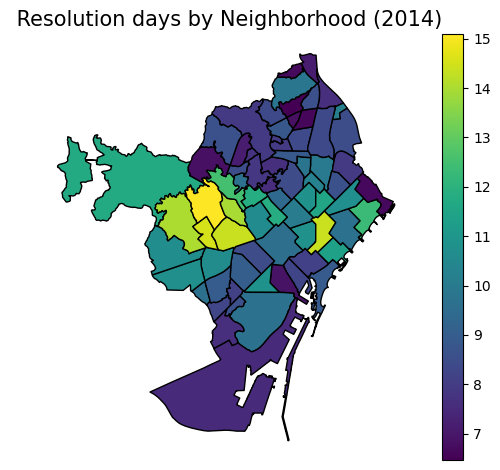

<Figure size 1200x800 with 0 Axes>

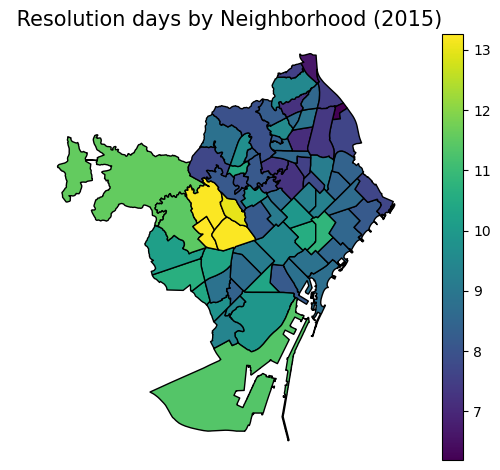

<Figure size 1200x800 with 0 Axes>

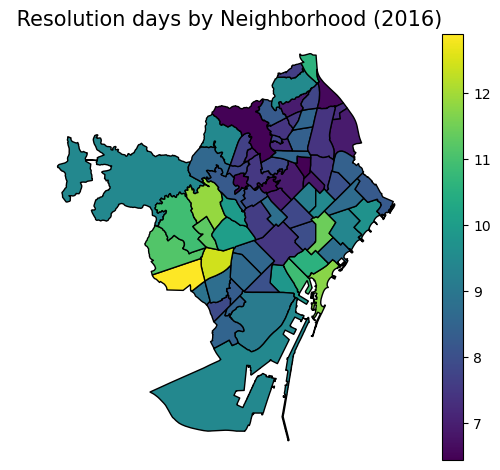

<Figure size 1200x800 with 0 Axes>

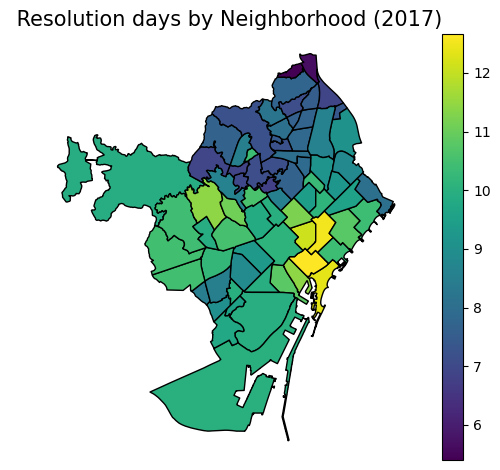

In [16]:
years = ['2014', '2015', '2016', '2017']
aver_resolution["Codi_Barri"] = aver_resolution["Codi_Barri"].astype(str)
for year in years:
    year_df = aver_resolution[aver_resolution["Any"].astype(str) == year]

    merged = barrios_gdf.merge(year_df, left_on="codi_barri", right_on="Codi_Barri")

    merged = merged[merged.geometry.notnull()]

    # Plot
    plt.figure(figsize=(12, 8))
    merged.plot(column="avg_resolution_days", cmap="viridis", legend=True, edgecolor="black")
    plt.title(f" Resolution days by Neighborhood ({year})", fontsize=15)
    plt.axis("off")
    plt.tight_layout()
    plt.show()

<Figure size 1200x800 with 0 Axes>

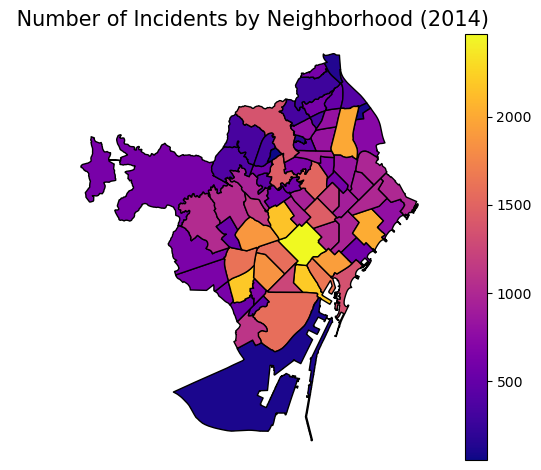

<Figure size 1200x800 with 0 Axes>

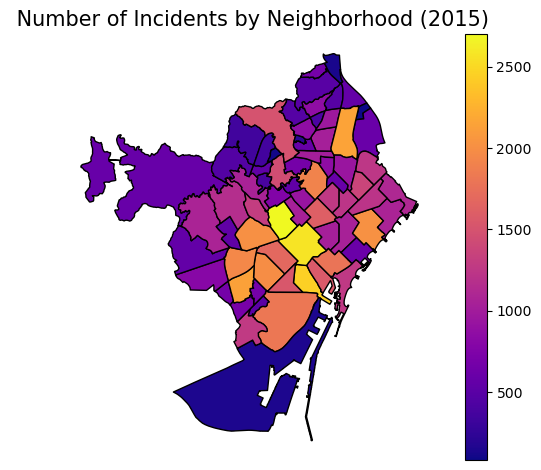

<Figure size 1200x800 with 0 Axes>

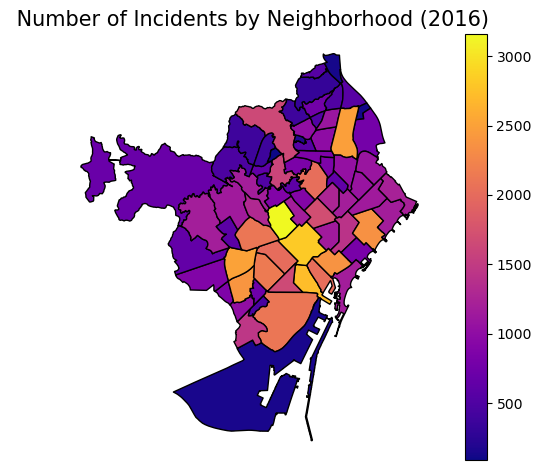

<Figure size 1200x800 with 0 Axes>

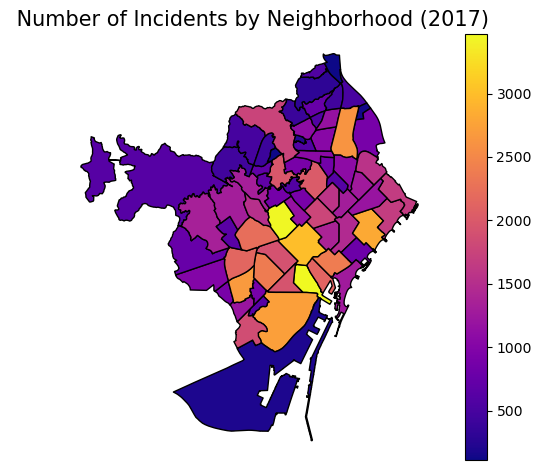

In [17]:
years = ['2014', '2015', '2016', '2017']
aver_resolution["Codi_Barri"] = aver_resolution["Codi_Barri"].astype(str)
for year in years:
    year_df = aver_resolution[aver_resolution["Any"].astype(str) == year]

    merged = barrios_gdf.merge(year_df, left_on="codi_barri", right_on="Codi_Barri")

    merged = merged[merged.geometry.notnull()]

    # Plot
    plt.figure(figsize=(12, 8))
    merged.plot(column="total_incidents", cmap="plasma", legend=True, edgecolor="black")
    plt.title(f" Number of Incidents by Neighborhood ({year})", fontsize=15)
    plt.axis("off")
    plt.tight_layout()
    plt.show()

---

In [20]:
barrios_gdf

,codi_districte,nom_districte,codi_barri,nom_barri,geometria_etrs89,geometria_wgs84,geometry
0,1,Ciutat Vella,1,el Raval,"POLYGON ((430164.372950341 4581940.39758424, 4...","POLYGON ((2.16473952857229 41.3859611263672, 2...","POLYGON ((2.16474 41.38596, 2.16404 41.38543, ..."
1,1,Ciutat Vella,2,el Barri Gòtic,"POLYGON ((431192.082442968 4581854.86907373, 4...","POLYGON ((2.17703981017875 41.3852793578426, 2...","POLYGON ((2.17704 41.38528, 2.17661 41.38561, ..."
2,1,Ciutat Vella,3,la Barceloneta,"POLYGON ((432800.888667699 4582084.69046333, 4...","POLYGON ((2.1962542114702 41.3874852975771, 2....","POLYGON ((2.19625 41.38749, 2.1962 41.38749, 2..."
3,1,Ciutat Vella,4,"Sant Pere, Santa Caterina i la Ribera","POLYGON ((431735.899600634 4582445.23444175, 4...","POLYGON ((2.18347683856251 41.390642940051, 2....","POLYGON ((2.18348 41.39064, 2.18241 41.39145, ..."
4,2,Eixample,5,el Fort Pienc,"POLYGON ((431743.977580732 4582629.06573617, 4...","POLYGON ((2.18355273505655 41.3922993404645, 2...","POLYGON ((2.18355 41.3923, 2.18676 41.39467, 2..."
...,...,...,...,...,...,...,...
68,10,Sant Martí,69,Diagonal Mar i el Front Marítim del Poblenou,"POLYGON ((434228.873282652 4584678.5490042, 43...","POLYGON ((2.21305050684114 41.4109655883131, 2...","POLYGON ((2.21305 41.41097, 2.21192 41.41183, ..."
69,10,Sant Martí,70,el Besòs i el Maresme,"POLYGON ((434093.743891643 4585871.79499967, 4...","POLYGON ((2.21130382869618 41.4217017644346, 2...","POLYGON ((2.2113 41.4217, 2.20878 41.41981, 2...."
70,10,Sant Martí,71,Provençals del Poblenou,"POLYGON ((432760.615644181 4584099.69680979, 4...","POLYGON ((2.19554880988141 41.4056305449051, 2...","POLYGON ((2.19555 41.40563, 2.19884 41.40646, ..."
71,10,Sant Martí,72,Sant Martí de Provençals,"POLYGON ((432902.229521415 4584707.96513488, 4...","POLYGON ((2.19717547409715 41.4111208750969, 2...","POLYGON ((2.19718 41.41112, 2.19837 41.41202, ..."


<Figure size 1200x800 with 0 Axes>

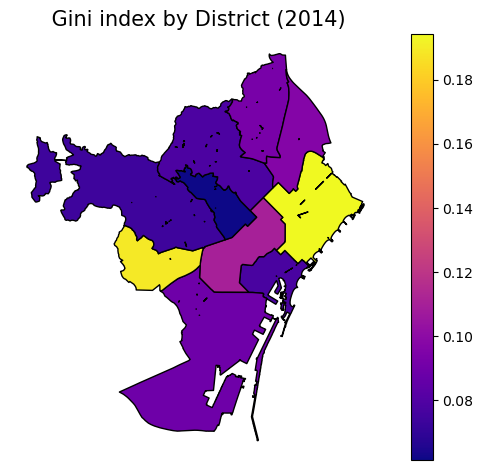

<Figure size 1200x800 with 0 Axes>

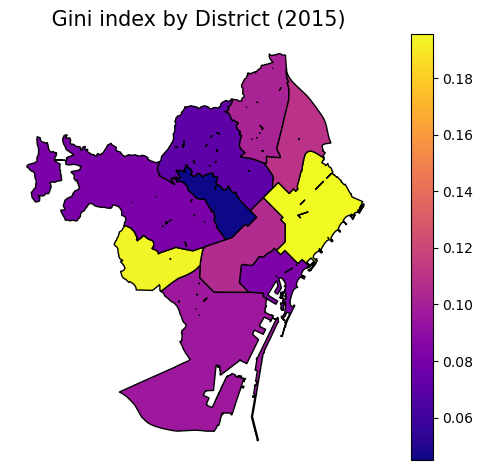

<Figure size 1200x800 with 0 Axes>

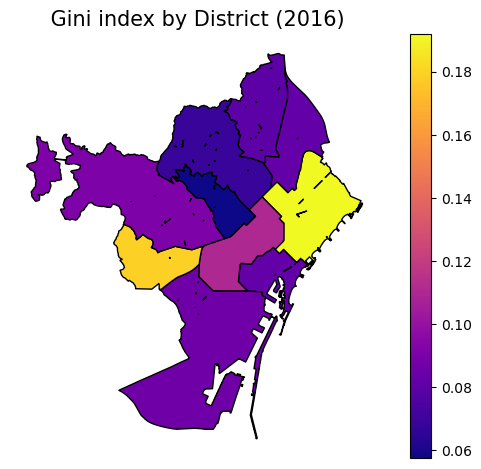

<Figure size 1200x800 with 0 Axes>

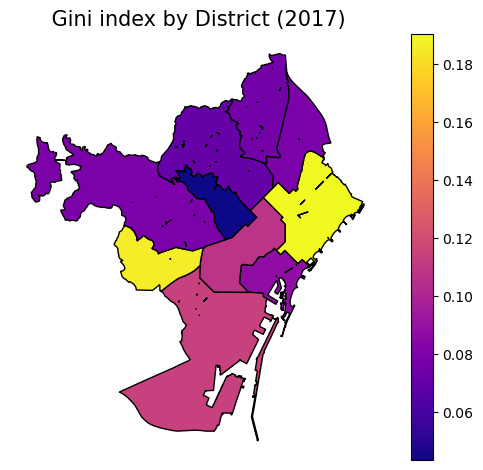

In [25]:

barrios_gdf["codi_districte"] = barrios_gdf["codi_districte"].astype(str)
gini_df["district_code"] = gini_df["district_code"].astype(str)

districts_gdf = barrios_gdf.dissolve(by="codi_districte", as_index=False) 

years = ['2014', '2015', '2016', '2017']
for year in years:
    year_df = gini_df[gini_df["year"].astype(str) == year]

    merged = districts_gdf.merge(year_df, left_on="codi_districte", right_on="district_code")

    merged = merged[merged.geometry.notnull()]

    # Plot
    plt.figure(figsize=(12, 8))
    merged.plot(
        column="gini_coefficient", 
        cmap="plasma",
        legend=True,
        edgecolor="black"
    )
    plt.title(f" Gini index by District ({year})", fontsize=15)
    plt.axis("off")
    plt.tight_layout()
    plt.show()


--- 

In [26]:
gini_df 

,district_code,year,district_name,mean_income,median_income,min_income,max_income,income_stddev,income_variance,neighborhoods_count,total_population,avg_neighborhood_population,gini_coefficient,coefficient_of_variation
0,6,2014,Gràcia,102.460000,103.7,81.6,118.1,13.280173,176.363000,5,120843,24168.600000,0.061448,0.129613
1,5,2014,Sarrià-Sant Gervasi,183.316667,191.8,140.2,217.8,27.420461,751.881667,6,146754,24459.000000,0.073567,0.149580
2,1,2014,Ciutat Vella,85.350000,84.5,65.9,98.5,14.178270,201.023333,4,102237,25559.250000,0.077475,0.166119
3,7,2014,Horta-Guinardó,80.309091,82.0,56.6,102.0,12.030998,144.744909,11,167235,15203.181818,0.078272,0.149809
4,3,2014,Sants-Montjuïc,71.687500,76.0,39.4,85.8,14.207989,201.866964,8,182234,22779.250000,0.089124,0.198193
5,8,2014,Nou Barris,50.430769,50.8,34.7,64.0,8.698217,75.658974,13,165718,12747.538462,0.092927,0.172478
6,9,2014,Sant Andreu,67.642857,72.7,45.9,83.3,12.858701,165.346190,7,146969,20995.571429,0.096908,0.190097
7,2,2014,Eixample,116.150000,104.5,92.4,165.3,26.972783,727.531000,6,265303,44217.166667,0.109796,0.232224
8,4,2014,Les Corts,163.233333,125.4,112.6,251.7,76.881229,5910.723333,3,81610,27203.333333,0.189368,0.470990
9,10,2014,Sant Martí,94.090000,81.0,57.2,168.8,37.240105,1386.825444,10,234489,23448.900000,0.194144,0.395792
